In [1]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install Tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install OS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement OS (from versions: none)
ERROR: No matching distribution found for OS


In [8]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [10]:
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

##### 분석 데이터 불러오기

In [11]:
path = "/content/drive/MyDrive/Deeplearning/tank"
os.chdir(path)
df = pd.read_csv("melting_tank.csv", encoding="cp949")

In [12]:
df.head()

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STD_DT       835200 non-null  object 
 1   NUM          835200 non-null  int64  
 2   MELT_TEMP    835200 non-null  int64  
 3   MOTORSPEED   835200 non-null  int64  
 4   MELT_WEIGHT  835200 non-null  int64  
 5   INSP         835200 non-null  float64
 6   TAG          835200 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ MB


In [14]:
df.describe()

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
count,835200.000000,835200.000000,835200.000000,835200.000000,835200.000000
mean,417599.500000,509.200623,459.782865,582.962125,3.194853
std,241101.616751,128.277519,639.436413,1217.604433,0.011822
min,0.000000,308.000000,0.000000,0.000000,3.170000
25%,208799.750000,430.000000,119.000000,186.000000,3.190000
50%,417599.500000,469.000000,168.000000,383.000000,3.190000
75%,626399.250000,502.000000,218.000000,583.000000,3.200000
max,835199.000000,832.000000,1804.000000,55252.000000,3.230000


In [15]:
df['STD_DT'] = df['STD_DT'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d %H:%M:%S'))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STD_DT       835200 non-null  datetime64[ns]
 1   NUM          835200 non-null  int64         
 2   MELT_TEMP    835200 non-null  int64         
 3   MOTORSPEED   835200 non-null  int64         
 4   MELT_WEIGHT  835200 non-null  int64         
 5   INSP         835200 non-null  float64       
 6   TAG          835200 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 44.6+ MB


In [17]:
df = df.set_index(['STD_DT'])

In [18]:
df.head(20)

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,,
2020-03-04 00:00:00,0,489,116,631,3.19,OK
2020-03-04 00:00:00,1,433,78,609,3.19,OK
2020-03-04 00:00:00,2,464,154,608,3.19,OK
2020-03-04 00:00:00,3,379,212,606,3.19,OK
2020-03-04 00:00:00,4,798,1736,604,3.21,OK
2020-03-04 00:00:00,5,743,1722,603,3.21,OK
2020-03-04 00:00:00,6,390,212,602,3.19,OK
2020-03-04 00:00:00,7,493,152,600,3.19,OK
2020-03-04 00:00:00,8,427,0,599,3.19,OK


In [19]:
col_name = ['MELT_TEMP','MOTORSPEED','MELT_WEIGHT','INSP','TAG']

##### 종속변인의 범주의 차이가 많이나 그래프를 보기에 좋지 못하다 그래서 정규화를 통해 불균형을 해결한다.

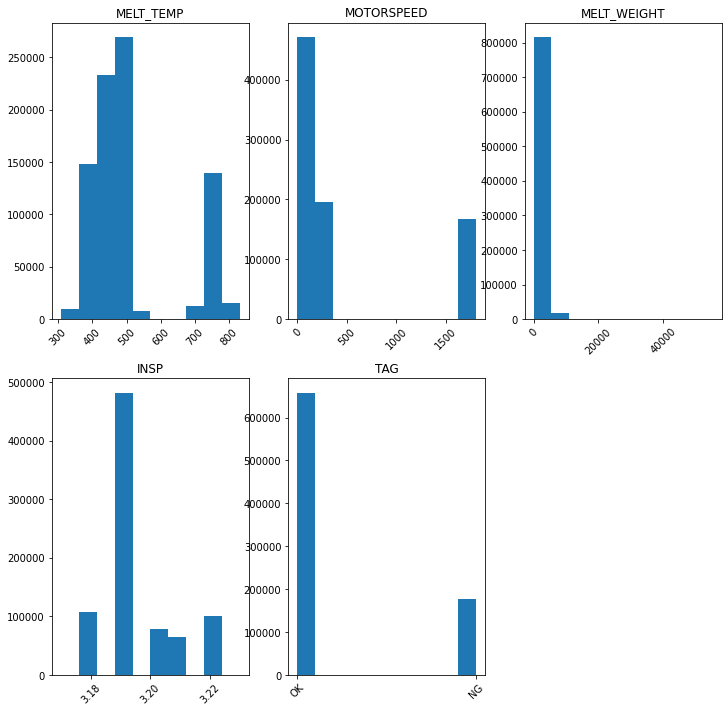

In [20]:
plt.figure(figsize=(12,12))
for i in range(len(col_name)):
  num = 231 +i # 그래프의 위치
  plt.subplot(num)
  plt.hist(df[col_name[i]])
  plt.xticks(rotation=45)
  plt.title(col_name[i])
plt.show()

##### 관측치의 패턴을 확인하기 위해서 히스토그램 말고 바차트로 그린다

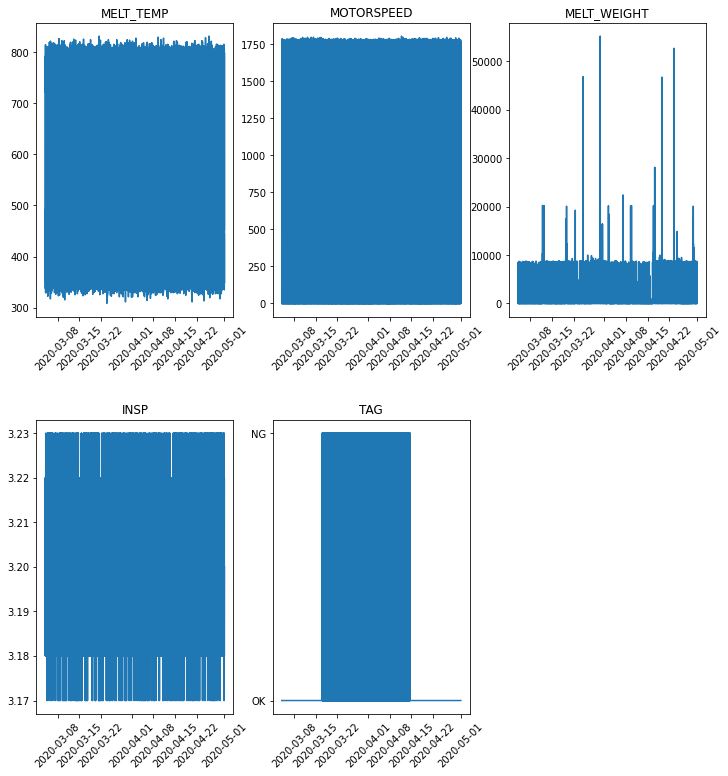

In [21]:
plt.figure(figsize=(12,12))
for i in range(len(col_name)):
  num = 231 +i # 그래프의 위치
  plt.subplot(num)
  plt.plot(df[col_name[i]])
  plt.xticks(rotation=45)
  plt.title(col_name[i])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

##### 관측치가 너무 많아 그래프이 패턴을 알기 어렵다. 이런경우 슬라이싱을 통해 특정 구간의 그래프를 그려서 살펴볼 수 있다.

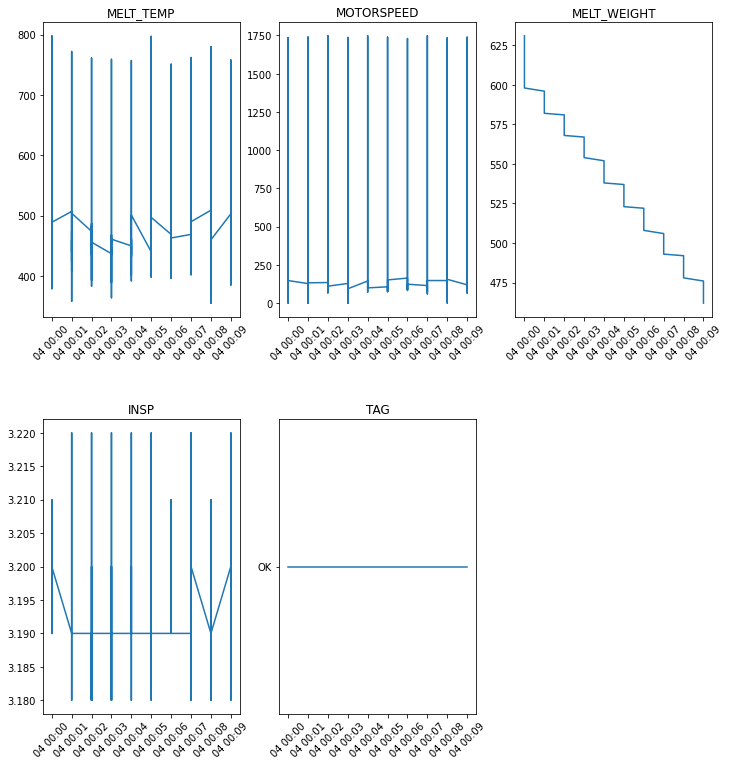

In [22]:
plt.figure(figsize=(12,12))
for i in range(len(col_name)):
  num = 231 +i # 그래프의 위치
  plt.subplot(num)
  plt.plot(df[col_name[i]][0:100])# 인덱스 0~99까지의 행을 선택
  plt.xticks(rotation=45)
  plt.title(col_name[i])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

##### 종속변수인 "TAG"가 범주형('OK','NG') 형태로 되어있기 때문에 모형에 넣기 위하여 해당 변수를 숫자 형태로 인코딩해주어야 한다.

In [23]:
encoder = preprocessing.LabelEncoder()
df['TAG'] = encoder.fit_transform(df['TAG'])
df['TAG'] = df['TAG'].astype('float32')

##### 범주형 종속변수가 숫자형태로 바뀐것을 확이 할 수있다.

In [24]:
df['TAG'].value_counts()

1.0    658133
0.0    177067
Name: TAG, dtype: int64

##### 상관분석

- 연속형 변수로 측정된 변수 간의 선형적 관계를 분석하는 기법



##### MELT_WEIGHT 변수를 보면 TAG변수와의 상관 관계가 음수로 좋지 못하게 나온다 그래서 비용적인 측면과 시간적인 측면을 위해 칼럼을 제거한다.

In [25]:
corr = df.corr(method = 'pearson')
corr

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
NUM,1.000000,0.000188,-0.000050,0.080079,-0.000524,0.086698
MELT_TEMP,0.000188,1.000000,0.944929,-0.000336,0.916295,0.310586
MOTORSPEED,-0.000050,0.944929,1.000000,0.000123,0.887813,0.264693
MELT_WEIGHT,0.080079,-0.000336,0.000123,1.000000,-0.000005,-0.012084
INSP,-0.000524,0.916295,0.887813,-0.000005,1.000000,0.272580
TAG,0.086698,0.310586,0.264693,-0.012084,0.272580,1.000000


In [26]:
df1 = df[['MELT_TEMP', 'MOTORSPEED','TAG']]

In [27]:
df1

,MELT_TEMP,MOTORSPEED,TAG
STD_DT,,,
2020-03-04 00:00:00,489,116,1.0
2020-03-04 00:00:00,433,78,1.0
2020-03-04 00:00:00,464,154,1.0
2020-03-04 00:00:00,379,212,1.0
2020-03-04 00:00:00,798,1736,1.0
...,...,...,...
2020-04-30 23:59:00,755,1743,1.0
2020-04-30 23:59:00,385,206,1.0
2020-04-30 23:59:00,465,148,1.0


##### 훈련/테스트 데이터 분리

In [28]:
split_date = int(df1.shape[0]*0.7) # 분리하는 기준을 데이터의 70%로 잡아서 분해, timestamp로 지정하여 분리하는 것도 가능하다.

In [29]:
split_date

584640

In [30]:
train = df1[:split_date]
test = df1[split_date:]

In [31]:
print(train.shape)
print(test.shape)

(584640, 3)
(250560, 3)


In [32]:
scaler = preprocessing.MinMaxScaler()

train_sc = scaler.fit_transform(train) 
test_sc = scaler.transform(test)

In [33]:
train_sc

array([[0.34541985, 0.06430155, 1.        ],
       [0.23854962, 0.04323725, 1.        ],
       [0.29770992, 0.08536585, 1.        ],
       ...,
       [0.31679389, 0.08203991, 1.        ],
       [0.1870229 , 0.03769401, 1.        ],
       [0.32251908, 0.05820399, 1.        ]])

In [34]:
X_train_values = train_sc[:, :-1]
y_train_values = train_sc[:,-1]

In [35]:
X_train_values

array([[0.34541985, 0.06430155],
       [0.23854962, 0.04323725],
       [0.29770992, 0.08536585],
       ...,
       [0.31679389, 0.08203991],
       [0.1870229 , 0.03769401],
       [0.32251908, 0.05820399]])

In [36]:
y_train_values

array([1., 1., 1., ..., 1., 1., 1.])

##### 클래스 불균형 문제 해결(SMOTE)
##### 클래스 불균형 설명 링크 : https://shinminyong.tistory.com/34

In [37]:
smote = SMOTE(random_state=0)

In [38]:
X_train_over,y_train_over = smote.fit_resample(X_train_values,y_train_values) # fit_resample로 함수명이 바뀌었다.
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train_values.shape, y_train_values.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포 : \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (584640, 2) (584640,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (821032, 2) (821032,)
SMOTE 적용 후 레이블 값 분포 : 
 1.0    410516
0.0    410516
dtype: int64


##### Window 정의 함수

In [39]:
def make_dataset(data, label, window_size):
  feature_list = []
  label_list = []
  for i in range(len(data) - window_size):
    feature_list.append(np.array(data.iloc[i:i+window_size]))
    label_list.append(np.array(label.iloc[i+window_size]))
  return np.array(feature_list), np.array(label_list)

In [40]:
X_train_over = pd.DataFrame(X_train_over, columns=['MELT_TEMP','MOTORSPEED'])
y_train_over = pd.DataFrame(y_train_over, columns=['TAG'])

In [41]:
train_feature, train_label = make_dataset(X_train_over, y_train_over, 10)

In [42]:
test_sc = pd.DataFrame(test_sc, columns=['MELT_TEMP','MOTORSPEED', 'TAG'])

In [43]:
feature_cols = ['MELT_TEMP', 'MOTORSPEED']
label_cols = ['TAG']

In [44]:
test_feature = test_sc[feature_cols]
test_label = test_sc[label_cols]


In [45]:
test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape

((250550, 10, 2), (250550, 1))

In [46]:
x_train, x_valid, y_train , y_valid= train_test_split(train_feature, train_label, test_size=0.3, random_state=0)

x_train.shape, x_valid.shape

((574715, 10, 2), (246307, 10, 2))

##### LSTM 모델 구축

In [47]:
model = Sequential()
model.add(LSTM(50,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='tanh',
               return_sequences=False)
)
model.add(Dense(1, activation='sigmoid'))

In [48]:
model_path = path

In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5) # 과적합 방지
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=0,
                             save_best_only=True, mode='auto')

In [50]:
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=50,
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
11495/11495 [==============================] - 118s 9ms/step - loss: 0.3611 - accuracy: 0.7968 - val_loss: 0.3470 - val_accuracy: 0.8017
Epoch 2/200
11495/11495 [==============================] - 101s 9ms/step - loss: 0.3466 - accuracy: 0.8039 - val_loss: 0.3466 - val_accuracy: 0.8048
Epoch 3/200
11495/11495 [==============================] - 83s 7ms/step - loss: 0.3466 - accuracy: 0.8042 - val_loss: 0.3466 - val_accuracy: 0.8048
Epoch 4/200
11495/11495 [==============================] - 80s 7ms/step - loss: 0.3463 - accuracy: 0.8045 - val_loss: 0.3463 - val_accuracy: 0.8030
Epoch 5/200
11495/11495 [==============================] - 70s 6ms/step - loss: 0.3462 - accuracy: 0.8041 - val_loss: 0.3462 - val_accuracy: 0.8050
Epoch 6/200
11495/11495 [==============================] - 80s 7ms/step - loss: 0.3461 - accuracy: 0.8041 - val_loss: 0.3459 - val_accuracy: 0.8067
Epoch 7/200
11495/11495 [==============================] - 79s 7ms/step - loss: 0.3461 - accuracy: 0.8047 - va

In [52]:
model.load_weights(filename)

pred = model.predict(test_feature)

7830/7830 [==============================] - 18s 2ms/step


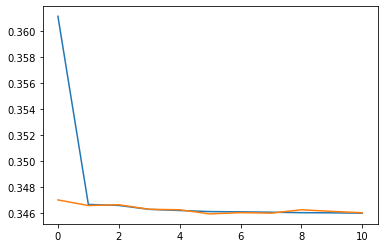

In [53]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend
plt.show()

In [54]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

In [55]:
pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x >= 0.5 else 0)

In [56]:
pred_df['TAG'].value_counts()

1    199820
0     50730
Name: TAG, dtype: int64

In [57]:
classify=confusion_matrix(test_label, pred_df)
print(classify)

[[  2155    785]
 [ 48575 199035]]


In [59]:
p = precision_score(test_label, pred_df)
print("precision: %0.4f" %p)
r = recall_score(test_label, pred_df)
print("recall: %0.4f" %r)
f1 = f1_score(test_label, pred_df)
print("f1-score: %0.4f" %f1)
acc = accuracy_score(test_label, pred_df)
print("accuracy: %0.4f" %acc)

precision: 0.9961
recall: 0.8038
f1-score: 0.8897
accuracy: 0.8030
